In [1]:
# 使用pandas读取数据
import pandas as pd


data_path = "./data/multi_logit.csv"
data = pd.read_csv(data_path)
data.columns = ["label", "x1", "x2"]
## 选取需要使用的列
data.groupby("label").count()

,x1,x2
label,,
0,27,27
1,50,50
2,31,31


In [2]:
# 使用多元逻辑回归模型进行建模
from sklearn.linear_model import LogisticRegression


features = ["x1", "x2"]
label = "label"
multi_logit_model = LogisticRegression(multi_class="multinomial", solver="sag",
                           max_iter=1000, random_state=42)
multi_logit_model.fit(data[features], data[label])
multi_logit_model.score(data[features], data[label])

0.7592592592592593

In [3]:
# 使用逻辑回归OvR进行建模
ovr_logit_model = LogisticRegression(multi_class="ovr", solver="sag",
                           max_iter=1000, random_state=42)
ovr_logit_model.fit(data[features], data[label])
ovr_logit_model.score(data[features], data[label])

0.7777777777777778

In [4]:
# 使用逻辑回归OvO进行建模
from sklearn.multiclass import OneVsOneClassifier


estimator = LogisticRegression(solver="sag", max_iter=1000, random_state=42)
ovo_logit_model = OneVsOneClassifier(estimator)
ovo_logit_model.fit(data[features], data[label])
ovo_logit_model.score(data[features], data[label])

0.7685185185185185

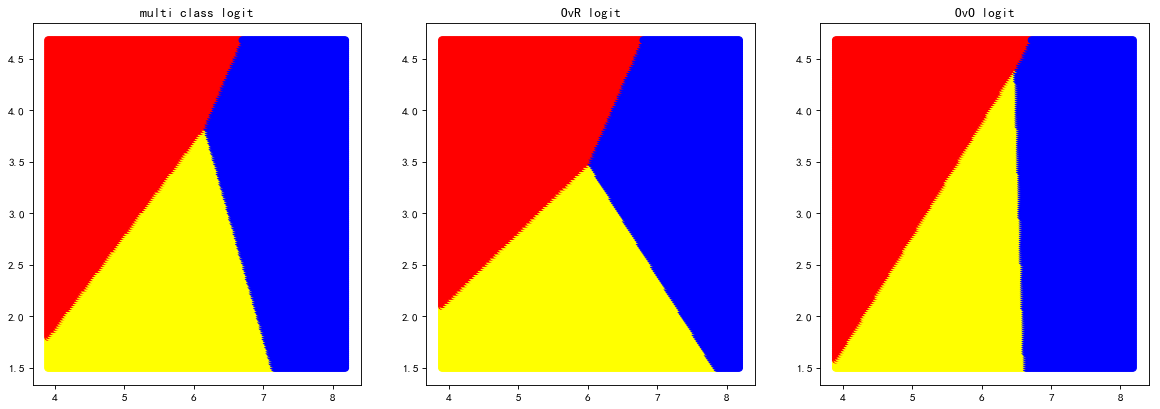

In [7]:
# 将模型结果可视化
import numpy as np
import matplotlib.pyplot as plt


## 准备预测的区域
x1_min, x2_min = np.min(data[features]) - 0.5
x1_max, x2_max = np.max(data[features]) + 0.5
area = np.dstack(
    np.meshgrid(
        np.arange(x1_min, x1_max, 0.02),
        np.arange(x2_min, x2_max, 0.02))).reshape(-1, 2)
colors = np.array(["red", "yellow", "blue"])
fig = plt.figure(figsize=(18, 6), dpi=80)
## 多元逻辑回归
ax = fig.add_subplot(1, 3, 1)
ax.scatter(area[:, 0], area[:, 1], c=colors[multi_logit_model.predict(area)])
ax.set_title("multi class logit")
## OvR逻辑回归
ax = fig.add_subplot(1, 3, 2)
ax.scatter(area[:, 0], area[:, 1], c=colors[ovr_logit_model.predict(area)])
ax.set_title("OvR logit")
## OvO逻辑回归
ax = fig.add_subplot(1, 3, 3)
ax.scatter(area[:, 0], area[:, 1], c=colors[ovo_logit_model.predict(area)])
ax.set_title("OvO logit")
plt.show()